# St. Petersburg vs. Tampa

## Which will be the location of the next great craft brewery?

The craft beer market is a growing industry.  There is a company trying to enter the arena and they want to do so in Tampa Bay, Florida.  They just are not sure if St. Petersburg or Tampa would be a better location.

According to the Brewers Association, U.S. Beer sales volume growth for 2019 overall was down 1.6% while the craft segment was up 3.6% and imports were up 1.8%.  The craft beer market is valued at $29.3 billion  and occupies 13.6% of the overall beer market.  Interestingly the overall beer production aligns with the overall volume growth for all beer and for craft beer.

Currently in Florida there are 329 Craft Breweries, ranking 9th in the country.  With only two breweries per 100,000 adults age twenty-one and up which ranks Florida 41st.  As for economic impact, the state ranks 5th with 3,818 million.  In terms of production the state ranks 4th producing 1,401,142 barrels in 2019.

Based on these statistics the state definitely has room for additional breweries to enter the playing field.  While we have a lot of breweries, the per capita ranking is very low.  With an ever growing population, now is the time to expand the craft beer market also.


### Data

Data being utilized will be from Foursquare.  This data will help to locate all locations that are considered craft breweries.  The data will also be analyzed to try to determine which brewery locations get more reviews, therefore potentially more business.  The relative location of each brewery to the next will also be considered to see if it impacts the success of the businesses. 

The next cell imports all libraries needed for the project.

In [1]:
import pandas as pd
import numpy as np
#!pip install geopy
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassif
! pip install folium
import folium


from IPython.display import Image
from IPython.core.display import HTML

import json
from pandas.io.json import json_normalize


print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 6.5 MB/s  eta 0:00:01
Libraries imported.


The following block of code will search for all breweries in Tampa and St. Petersburg.  It will also use the Foursquare API to find location dat of ratings and tips for the breweries.

In [2]:
CLIENT_ID = 'H5KGSVX0LK3XUNBPMWSWTHP0Q0YSJJNSNAC2XHWGWH4KH25L' 
CLIENT_SECRET = 'KC402O2PMBUX5TPRSMM3AB4Y2VQWEQWSRNP4XFINZMGBONTF' 
ACCESS_TOKEN = 'QPHSL3KF4XRHDHUXXHOG1F2EO4N3AX5J5LVAJ2JRAE1COC42' 
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H5KGSVX0LK3XUNBPMWSWTHP0Q0YSJJNSNAC2XHWGWH4KH25L
CLIENT_SECRET:KC402O2PMBUX5TPRSMM3AB4Y2VQWEQWSRNP4XFINZMGBONTF


## The search and narrowing of breweries in Tampa

In [3]:
address = 'Tampa, FL'

geolocator = Nominatim(user_agent="tampa_agent")
location = geolocator.geocode(address)
lattampa = location.latitude
longtampa = location.longitude
print(lattampa, longtampa)

27.9477595 -82.458444


In [4]:
query_tampa1 = 'brewing', 'beer'
radius = 11300


url1 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,  
    lattampa, 
    longtampa,
    ACCESS_TOKEN,
    VERSION,
    query_tampa1,
    radius, 
    LIMIT)
url1 

"https://api.foursquare.com/v2/venues/search?&client_id=H5KGSVX0LK3XUNBPMWSWTHP0Q0YSJJNSNAC2XHWGWH4KH25L&client_secret=KC402O2PMBUX5TPRSMM3AB4Y2VQWEQWSRNP4XFINZMGBONTF&ll=27.9477595,-82.458444&oauth_token=QPHSL3KF4XRHDHUXXHOG1F2EO4N3AX5J5LVAJ2JRAE1COC42&v=20180604&query=('brewing', 'beer')&radius=11300&limit=100"

In [5]:
results1 = requests.get(url1).json()
results1

venues1 = results1['response']['venues']

tampa1 = pd.json_normalize(venues1)
tampa1.head()

none = 'NaN'
filt_col1 = ['name', 'categories'] + [col for col in tampa1.columns if col.startswith('location.')]+['id']
tampa_filtered1 = tampa1.loc[:, filt_col1]

def get_category1(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venues.categories']
        
    if len(categories_list) == 0:
        return none
    else:
        return categories_list[0]['name']
    
tampa_filtered1['categories'] = tampa_filtered1.apply(get_category1, axis = 1)

tampa_filtered1.columns = [column.split('.')[-1] for column in tampa_filtered1.columns]

tampa_filtered1

df_t1 = tampa_filtered1[["name", "categories", "lat", "lng", "address", "city", 'id']]
df_t1.head()

df_t1 = df_t1.rename(columns = {"name":"Brewery", "categories":"Category", "lat":"Latitude", "lng":"Longitude", "address":"Address", "city":"City", "id":"ID"})
df_t1.head()

df_tbrew1 = df_t1[df_t1['Category'] == 'Brewery']
df_tbrew1

,Brewery,Category,Latitude,Longitude,Address,City,ID
2,Magnanimous Brewing,Brewery,27.957129,-82.459690,1420 N Florida Ave,Tampa,5f7a53e40fbf3e62495f8c42
6,Late Start Brewing,Brewery,27.951219,-82.447626,1208 E Kennedy Blvd,Tampa,5b88869f8fb09e002c3c66cf
8,Cigar City Brewing,Brewery,27.959029,-82.509174,3924 W Spruce St,Tampa,4b194b21f964a520b3da23e3
9,BarrieHaus Beer Co,Brewery,27.958858,-82.443604,1403 E 5th Ave,Tampa,5de91ac356473100088a12ea
10,Bastet Brewing,Brewery,27.955687,-82.436799,1951 E Adamo Dr Ste B,Tampa,5fa6f7d3362cd92c7793ddd8
11,Brew Bus Brewing,Brewery,27.982624,-82.458709,4101 N Florida Ave,Tampa,5b942018121384002c2fddab
14,Bay Cannon Beer Company,Brewery,27.957056,-82.481157,2106 W Main St,Tampa,5d4214ab60202800089503d0
17,Woven Water Brewing Company,Brewery,27.966743,-82.467440,456 W Columbus Dr,Tampa,5f88ecf2bc318524eff7bfe0
23,Coppertail Brewing Company,Brewery,27.955958,-82.430185,2601 E 2nd Ave,Tampa,518d5396498e3007fa0a484f
28,Rock Brothers Brewing,Brewery,27.961091,-82.442839,1901 E 15th Street,Tampa,5527da82498e6e675ef86602


In [6]:
df_tbrew1 = df_tbrew1.drop([28, 31, 42])
df_tbrew1

,Brewery,Category,Latitude,Longitude,Address,City,ID
2,Magnanimous Brewing,Brewery,27.957129,-82.459690,1420 N Florida Ave,Tampa,5f7a53e40fbf3e62495f8c42
6,Late Start Brewing,Brewery,27.951219,-82.447626,1208 E Kennedy Blvd,Tampa,5b88869f8fb09e002c3c66cf
8,Cigar City Brewing,Brewery,27.959029,-82.509174,3924 W Spruce St,Tampa,4b194b21f964a520b3da23e3
9,BarrieHaus Beer Co,Brewery,27.958858,-82.443604,1403 E 5th Ave,Tampa,5de91ac356473100088a12ea
10,Bastet Brewing,Brewery,27.955687,-82.436799,1951 E Adamo Dr Ste B,Tampa,5fa6f7d3362cd92c7793ddd8
11,Brew Bus Brewing,Brewery,27.982624,-82.458709,4101 N Florida Ave,Tampa,5b942018121384002c2fddab
14,Bay Cannon Beer Company,Brewery,27.957056,-82.481157,2106 W Main St,Tampa,5d4214ab60202800089503d0
17,Woven Water Brewing Company,Brewery,27.966743,-82.467440,456 W Columbus Dr,Tampa,5f88ecf2bc318524eff7bfe0
23,Coppertail Brewing Company,Brewery,27.955958,-82.430185,2601 E 2nd Ave,Tampa,518d5396498e3007fa0a484f
33,81Bay Brewing Co.,Brewery,27.895515,-82.519943,4465 W Gandy Blvd Ste 600,Tampa,5756d5e3498e698aec07fff2


In [7]:
df_tbrew1=df_tbrew1.rename(index={2:0, 6:1, 8:2, 9:3, 10:4, 11:5, 14:6, 17:7, 23:8, 33:9, 49:10})
df_tbrew1

,Brewery,Category,Latitude,Longitude,Address,City,ID
0,Magnanimous Brewing,Brewery,27.957129,-82.459690,1420 N Florida Ave,Tampa,5f7a53e40fbf3e62495f8c42
1,Late Start Brewing,Brewery,27.951219,-82.447626,1208 E Kennedy Blvd,Tampa,5b88869f8fb09e002c3c66cf
2,Cigar City Brewing,Brewery,27.959029,-82.509174,3924 W Spruce St,Tampa,4b194b21f964a520b3da23e3
3,BarrieHaus Beer Co,Brewery,27.958858,-82.443604,1403 E 5th Ave,Tampa,5de91ac356473100088a12ea
4,Bastet Brewing,Brewery,27.955687,-82.436799,1951 E Adamo Dr Ste B,Tampa,5fa6f7d3362cd92c7793ddd8
5,Brew Bus Brewing,Brewery,27.982624,-82.458709,4101 N Florida Ave,Tampa,5b942018121384002c2fddab
6,Bay Cannon Beer Company,Brewery,27.957056,-82.481157,2106 W Main St,Tampa,5d4214ab60202800089503d0
7,Woven Water Brewing Company,Brewery,27.966743,-82.467440,456 W Columbus Dr,Tampa,5f88ecf2bc318524eff7bfe0
8,Coppertail Brewing Company,Brewery,27.955958,-82.430185,2601 E 2nd Ave,Tampa,518d5396498e3007fa0a484f
9,81Bay Brewing Co.,Brewery,27.895515,-82.519943,4465 W Gandy Blvd Ste 600,Tampa,5756d5e3498e698aec07fff2


In [8]:
query_tampa2 = 'werks', 'angry'
radius = 11300


url2 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,  
    lattampa, 
    longtampa,
    ACCESS_TOKEN,
    VERSION,
    query_tampa2,
    radius, 
    LIMIT)
url2 

results2 = requests.get(url2).json()
results2

venues2 = results2['response']['venues']

tampa2 = pd.json_normalize(venues2)
tampa2.head()

none = 'NaN'
filt_col2 = ['name', 'categories'] + [col for col in tampa2.columns if col.startswith('location.')]+['id']
tampa_filtered2 = tampa2.loc[:, filt_col2]

def get_category2(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venues.categories']
        
    if len(categories_list) == 0:
        return none
    else:
        return categories_list[0]['name']
    
tampa_filtered2['categories'] = tampa_filtered2.apply(get_category2, axis = 1)

tampa_filtered2.columns = [column.split('.')[-1] for column in tampa_filtered2.columns]

tampa_filtered2

df_t2 = tampa_filtered2[["name", "categories", "lat", "lng", "address", "city", 'id']]
df_t2.head()

df_t2 = df_t2.rename(columns = {"name":"Brewery", "categories":"Category", "lat":"Latitude", "lng":"Longitude", "address":"Address", "city":"City", "id":"ID"})
df_t2.head()


df_tbrew2 = df_t2[df_t2['Category'] == 'Brewery']
df_tbrew2

,Brewery,Category,Latitude,Longitude,Address,City,ID
0,Zydeco Brew Werks,Brewery,27.960331,-82.437861,1902 E 7th Ave,Tampa,5aa56435d48ec164c10b5b71
6,Angry Chair Brewing,Brewery,28.005101,-82.459300,6401 N Florida Ave,Tampa,545bf2eb498eb011277dff61


In [9]:
df_tbrew2=df_tbrew2.rename(index={0:11, 6:12})
df_tbrew2

,Brewery,Category,Latitude,Longitude,Address,City,ID
11,Zydeco Brew Werks,Brewery,27.960331,-82.437861,1902 E 7th Ave,Tampa,5aa56435d48ec164c10b5b71
12,Angry Chair Brewing,Brewery,28.005101,-82.459300,6401 N Florida Ave,Tampa,545bf2eb498eb011277dff61


In [10]:
query_tampa3 = 'brew', 'hidden'
radius = 11300


url3 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,  
    lattampa, 
    longtampa,
    ACCESS_TOKEN,
    VERSION,
    query_tampa3,
    radius, 
    LIMIT)
url3 

results3 = requests.get(url3).json()
results3

venues3 = results3['response']['venues']

tampa3 = pd.json_normalize(venues3)
tampa3.head()

none = 'NaN'
filt_col3 = ['name', 'categories'] + [col for col in tampa3.columns if col.startswith('location.')]+['id']
tampa_filtered3 = tampa3.loc[:, filt_col2]

def get_category3(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venues.categories']
        
    if len(categories_list) == 0:
        return none
    else:
        return categories_list[0]['name']
    
tampa_filtered3['categories'] = tampa_filtered3.apply(get_category3, axis = 1)

tampa_filtered3.columns = [column.split('.')[-1] for column in tampa_filtered3.columns]

tampa_filtered3

df_t3 = tampa_filtered3[["name", "categories", "lat", "lng", "address", "city", 'id']]
df_t3.head()

df_t3 = df_t3.rename(columns = {"name":"Brewery", "categories":"Category", "lat":"Latitude", "lng":"Longitude", "address":"Address", "city":"City", "id":"ID"})
df_t3

,Brewery,Category,Latitude,Longitude,Address,City,ID
0,Buddy Brew Coffee,Coffee Shop,27.944960,-82.464593,420 W Kennedy Blvd,Tampa,511443dae4b054e531a021b0
1,Buddy Brew Coffee,Coffee Shop,27.947636,-82.459057,NaN,Tampa,5c6dbc6983e380002bfaf9bb
2,Gardener-Brewer Monfort & Perotti,NaN,27.947406,-82.458772,400 N Tampa St Ste 2600,Tampa,4d6c094e9d7e2d43403326b3
3,Pint And Brew Downtown Tampa,Beer Bar,27.946546,-82.458500,200 North Tampa Street,Tampa,5b40e5595a2c91002cb6c151
4,Buddy Brew Coffee,Coffee Shop,27.944645,-82.480715,2020 W Kennedy Blvd,Tampa,4bf158d325afb71350004b6f
5,Buddy Brew Coffee Hyde Park,Coffee Shop,27.936071,-82.476109,1605 W Snow Ave,Tampa,578fba9e498e644dec50fd0c
6,Hidden Star Tiki Bar,Cocktail Bar,27.948911,-82.459890,NaN,Tampa,5d5759623775ad00082c25bf
7,Brewster Technical Center,Trade School,27.963583,-82.461761,2222 N Tampa St,Tampa,4be98ed3415e20a153f6e3bb
8,Paradise Cove Brew Pub,Pub,27.944255,-82.452625,"401 Channelside Dr, Tampa, FL 33602",Tampa,4f3b1d73e4b03c8a49397e5b
9,Brewster Student Services,Student Center,27.963621,-82.461601,"2222 N Tampa St, Tampa, FL 33602",Tampa,4f0ee9bde4b0d2af7352bcee


In [11]:
df_t3 = df_t3.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
df_t3

,Brewery,Category,Latitude,Longitude,Address,City,ID
13,Tampa Bay Brewing Company,American Restaurant,27.961216,-82.441596,1600 E 8th Ave,Tampa,4af247a8f964a5201be721e3
17,Hidden Springs Ale Works,Brewery,27.959310,-82.460215,1631 N Franklin St,Tampa,55fc792c498effa71c8bec43


In [12]:
df_t3=df_t3.rename(index={17:14})
df_t3

,Brewery,Category,Latitude,Longitude,Address,City,ID
13,Tampa Bay Brewing Company,American Restaurant,27.961216,-82.441596,1600 E 8th Ave,Tampa,4af247a8f964a5201be721e3
14,Hidden Springs Ale Works,Brewery,27.959310,-82.460215,1631 N Franklin St,Tampa,55fc792c498effa71c8bec43


Because the breweries had to be located using multiple search items, I ended with 3 separate lists.  The next line combines them into one database for the Tampa breweries.

In [13]:
t_brews = df_tbrew1.append([df_tbrew2, df_t3])
t_brews

,Brewery,Category,Latitude,Longitude,Address,City,ID
0,Magnanimous Brewing,Brewery,27.957129,-82.459690,1420 N Florida Ave,Tampa,5f7a53e40fbf3e62495f8c42
1,Late Start Brewing,Brewery,27.951219,-82.447626,1208 E Kennedy Blvd,Tampa,5b88869f8fb09e002c3c66cf
2,Cigar City Brewing,Brewery,27.959029,-82.509174,3924 W Spruce St,Tampa,4b194b21f964a520b3da23e3
3,BarrieHaus Beer Co,Brewery,27.958858,-82.443604,1403 E 5th Ave,Tampa,5de91ac356473100088a12ea
4,Bastet Brewing,Brewery,27.955687,-82.436799,1951 E Adamo Dr Ste B,Tampa,5fa6f7d3362cd92c7793ddd8
5,Brew Bus Brewing,Brewery,27.982624,-82.458709,4101 N Florida Ave,Tampa,5b942018121384002c2fddab
6,Bay Cannon Beer Company,Brewery,27.957056,-82.481157,2106 W Main St,Tampa,5d4214ab60202800089503d0
7,Woven Water Brewing Company,Brewery,27.966743,-82.467440,456 W Columbus Dr,Tampa,5f88ecf2bc318524eff7bfe0
8,Coppertail Brewing Company,Brewery,27.955958,-82.430185,2601 E 2nd Ave,Tampa,518d5396498e3007fa0a484f
9,81Bay Brewing Co.,Brewery,27.895515,-82.519943,4465 W Gandy Blvd Ste 600,Tampa,5756d5e3498e698aec07fff2


## Mapping Breweries in Tampa

In [14]:
tampa_map = folium.Map(location = [lattampa, longtampa], zoom_start=12)

folium.CircleMarker(
    [lattampa, longtampa],
    radius = 10,
    color = 'green',
    popup='Tampa',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.5).add_to(tampa_map)

for lat, lng, label in zip(t_brews.Latitude, t_brews.Longitude, t_brews.Brewery):
    folium.CircleMarker(
        [lat, lng],
        color='blue',
        popup=label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.3).add_to(tampa_map)
    
tampa_map

## The search and narrowing of breweries in St. Pete

In [15]:
stpeteaddress = 'St. Petersburg, FL'

geolocator2 = Nominatim(user_agent="stpete_agent")
location2 = geolocator2.geocode(stpeteaddress)
latstpete = location2.latitude
longstpete = location2.longitude
print(latstpete, longstpete)

27.7703796 -82.6695085


In [16]:
query_stp1 = 'brew', 'beer'
radius = 10000


urlstp1 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,  
    latstpete, 
    longstpete,
    ACCESS_TOKEN,
    VERSION,
    query_stp1,
    radius, 
    LIMIT)
urlstp1 

result1 = requests.get(urlstp1).json()
result1

venue1 = result1['response']['venues']

stpete1 = pd.json_normalize(venue1)
stpete1.head()

none = 'NaN'
filt_colstp1 = ['name', 'categories'] + [col for col in stpete1.columns if col.startswith('location.')]+['id']
stpete_filtered1 = stpete1.loc[:, filt_colstp1]

def get_categorystp(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venues.categories']
        
    if len(categories_list) == 0:
        return none
    else:
        return categories_list[0]['name']
    
stpete_filtered1['categories'] = stpete_filtered1.apply(get_categorystp, axis = 1)

stpete_filtered1.columns = [column.split('.')[-1] for column in stpete_filtered1.columns]

stpete_filtered1

df_stp1 = stpete_filtered1[["name", "categories", "lat", "lng", "address", "city", 'id']]
df_stp1.head()

df_stp1 = df_stp1.rename(columns = {"name":"Brewery", "categories":"Category", "lat":"Latitude", "lng":"Longitude", "address":"Address", "city":"City", "id":"ID"})
df_stp1.head()

df_stpbrew1 = df_stp1[df_stp1['Category'] == 'Brewery']
df_stpbrew1

,Brewery,Category,Latitude,Longitude,Address,City,ID
6,Grand Central Brewhouse,Brewery,27.770820,-82.665236,2340 Central Avenue,Saint Petersburg,5fa1cf5e7e8d734bf9e9a356
10,Bayboro Brewing,Brewery,27.765949,-82.665672,2390 5th Ave S,Saint Petersburg,5e764e153dba560008f1854a
15,If I Brewed The World,Brewery,27.769867,-82.663230,2200 1st Ave S,Saint Petersburg,5c0d7e024a1cc0002ccb7cad
23,Winning Table @ Brewhouse #Yankees,Brewery,27.766495,-82.651358,NaN,Saint Petersburg,4e24f64de4cda4c1ef3a73fd
27,Brewing Bad Labs,Brewery,27.809541,-82.719900,NaN,Saint Petersburg,50ea3534e4b067460bf43621
28,Ambassador Brewing,Brewery,27.766153,-82.695435,4560 5th Ave S,Saint Petersburg,5bff2fecb77c77002cf0244a
29,aggregate brewing collective,Brewery,27.771862,-82.641334,554 1st Ave N,Saint Petersburg,5d966eb923cde1000774393b
37,3 Daughters Brewery,Brewery,27.768896,-82.662594,222 22nd St S,Saint Petersburg,52aa48c7498e3872b0113af3
39,Overflow Brewing Company,Brewery,27.771925,-82.644665,770 1st Ave N,Saint Petersburg,5aedfe01b9b37b002c4f7f9a
41,Gulfport Brewery + Eatery,Brewery,27.739981,-82.708106,3007 Beach Blvd S,Gulfport,5f2c5825ac280a67936da4ed


In [17]:
df_stpbrew1 = df_stpbrew1.drop([6, 23, 27, 28, 29, 41, 43])
df_stpbrew1

,Brewery,Category,Latitude,Longitude,Address,City,ID
10,Bayboro Brewing,Brewery,27.765949,-82.665672,2390 5th Ave S,Saint Petersburg,5e764e153dba560008f1854a
15,If I Brewed The World,Brewery,27.769867,-82.663230,2200 1st Ave S,Saint Petersburg,5c0d7e024a1cc0002ccb7cad
37,3 Daughters Brewery,Brewery,27.768896,-82.662594,222 22nd St S,Saint Petersburg,52aa48c7498e3872b0113af3
39,Overflow Brewing Company,Brewery,27.771925,-82.644665,770 1st Ave N,Saint Petersburg,5aedfe01b9b37b002c4f7f9a
42,St Pete Brewing Company,Brewery,27.771907,-82.641022,544 1st Ave N,Saint Petersburg,526a719f11d2cb793dc76ded
44,Green Bench Brewing Co.,Brewery,27.771589,-82.650634,1133 Baum Ave N,Saint Petersburg,50fabed6e4b0b3db9b6b3c84
49,Mastry's Brewing,Brewery,27.785856,-82.729492,1462 66th St N,Saint Petersburg,55a185bd498ec7e742b5bb87


In [19]:
df_stpbrew1=df_stpbrew1.rename(index={10:15})
df_stpbrew1

,Brewery,Category,Latitude,Longitude,Address,City,ID
15,Bayboro Brewing,Brewery,27.765949,-82.665672,2390 5th Ave S,Saint Petersburg,5e764e153dba560008f1854a
16,If I Brewed The World,Brewery,27.769867,-82.663230,2200 1st Ave S,Saint Petersburg,5c0d7e024a1cc0002ccb7cad
17,3 Daughters Brewery,Brewery,27.768896,-82.662594,222 22nd St S,Saint Petersburg,52aa48c7498e3872b0113af3
18,Overflow Brewing Company,Brewery,27.771925,-82.644665,770 1st Ave N,Saint Petersburg,5aedfe01b9b37b002c4f7f9a
19,St Pete Brewing Company,Brewery,27.771907,-82.641022,544 1st Ave N,Saint Petersburg,526a719f11d2cb793dc76ded
20,Green Bench Brewing Co.,Brewery,27.771589,-82.650634,1133 Baum Ave N,Saint Petersburg,50fabed6e4b0b3db9b6b3c84
21,Mastry's Brewing,Brewery,27.785856,-82.729492,1462 66th St N,Saint Petersburg,55a185bd498ec7e742b5bb87


In [20]:
query_stp2 = 'brewing', 'ale'
radius = 10000


urlstp2 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,  
    latstpete, 
    longstpete,
    ACCESS_TOKEN,
    VERSION,
    query_stp2,
    radius, 
    LIMIT)
urlstp2 

result2 = requests.get(urlstp2).json()
result2

venue2 = result2['response']['venues']

stpete2 = pd.json_normalize(venue2)
stpete2.head()

none = 'NaN'
filt_colstp2 = ['name', 'categories'] + [col for col in stpete2.columns if col.startswith('location.')]+['id']
stpete_filtered2 = stpete2.loc[:, filt_colstp2]

def get_categorystp2(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venues.categories']
        
    if len(categories_list) == 0:
        return none
    else:
        return categories_list[0]['name']
    
stpete_filtered2['categories'] = stpete_filtered2.apply(get_categorystp2, axis = 1)

stpete_filtered2.columns = [column.split('.')[-1] for column in stpete_filtered2.columns]

stpete_filtered2

df_stp2 = stpete_filtered2[["name", "categories", "lat", "lng", "address", "city", 'id']]
df_stp2.head()

df_stp2 = df_stp2.rename(columns = {"name":"Brewery", "categories":"Category", "lat":"Latitude", "lng":"Longitude", "address":"Address", "city":"City", "id":"ID"})
df_stp2.head()

df_stpbrew2 = df_stp2[df_stp2['Category'] == 'Brewery']
df_stpbrew2

,Brewery,Category,Latitude,Longitude,Address,City,ID
0,Bayboro Brewing,Brewery,27.765949,-82.665672,2390 5th Ave S,Saint Petersburg,5e764e153dba560008f1854a
1,Green Bench Brewing Co.,Brewery,27.771589,-82.650634,1133 Baum Ave N,Saint Petersburg,50fabed6e4b0b3db9b6b3c84
3,Pinellas Ale Works,Brewery,27.769930,-82.660134,1962 1st Ave S,Saint Petersburg,53a64169498ec347d319e6cd
4,Brewing Bad Labs,Brewery,27.809541,-82.719900,NaN,Saint Petersburg,50ea3534e4b067460bf43621
6,St Pete Brewing Company,Brewery,27.771907,-82.641022,544 1st Ave N,Saint Petersburg,526a719f11d2cb793dc76ded
10,Ambassador Brewing,Brewery,27.766153,-82.695435,4560 5th Ave S,Saint Petersburg,5bff2fecb77c77002cf0244a
12,Inoculum Ale Works,Brewery,27.771809,-82.641305,554 1st Ave N,Saint Petersburg,5b2d09c58496ca002c5ffa5f
13,Overflow Brewing Company,Brewery,27.771925,-82.644665,770 1st Ave N,Saint Petersburg,5aedfe01b9b37b002c4f7f9a
14,aggregate brewing collective,Brewery,27.771862,-82.641334,554 1st Ave N,Saint Petersburg,5d966eb923cde1000774393b
17,Cage Brewing,Brewery,27.770467,-82.660508,2001 1st Ave S,Saint Petersburg,561c1876498e9e3503184839


In [21]:
df_stpbrew2 = df_stpbrew2.drop([0, 1, 4, 6, 10, 12, 13, 14, 31, 32, 35, 41, 49])
df_stpbrew2

,Brewery,Category,Latitude,Longitude,Address,City,ID
3,Pinellas Ale Works,Brewery,27.769930,-82.660134,1962 1st Ave S,Saint Petersburg,53a64169498ec347d319e6cd
17,Cage Brewing,Brewery,27.770467,-82.660508,2001 1st Ave S,Saint Petersburg,561c1876498e9e3503184839
25,Flying Boat Brewing Company,Brewery,27.782720,-82.657741,1776 11th Ave N,Saint Petersburg,58e2f4ea19b1ad5555144481
33,Cycle Brewing,Brewery,27.771076,-82.640954,524 Central Ave,Saint Petersburg,51fd84db498ea64130dc3099
36,Dissent Craft Brewing Company,Brewery,27.822307,-82.670411,5518 Haines Rd N,Saint Petersburg,5a6dde4542d8c210b5ed4cef


In [23]:
df_stpbrew2=df_stpbrew2.rename(index={33:25})
df_stpbrew2

,Brewery,Category,Latitude,Longitude,Address,City,ID
22,Pinellas Ale Works,Brewery,27.769930,-82.660134,1962 1st Ave S,Saint Petersburg,53a64169498ec347d319e6cd
23,Cage Brewing,Brewery,27.770467,-82.660508,2001 1st Ave S,Saint Petersburg,561c1876498e9e3503184839
24,Flying Boat Brewing Company,Brewery,27.782720,-82.657741,1776 11th Ave N,Saint Petersburg,58e2f4ea19b1ad5555144481
25,Cycle Brewing,Brewery,27.771076,-82.640954,524 Central Ave,Saint Petersburg,51fd84db498ea64130dc3099
26,Dissent Craft Brewing Company,Brewery,27.822307,-82.670411,5518 Haines Rd N,Saint Petersburg,5a6dde4542d8c210b5ed4cef


In [24]:
stp_brews = df_stpbrew1.append([df_stpbrew2])
stp_brews

,Brewery,Category,Latitude,Longitude,Address,City,ID
15,Bayboro Brewing,Brewery,27.765949,-82.665672,2390 5th Ave S,Saint Petersburg,5e764e153dba560008f1854a
16,If I Brewed The World,Brewery,27.769867,-82.663230,2200 1st Ave S,Saint Petersburg,5c0d7e024a1cc0002ccb7cad
17,3 Daughters Brewery,Brewery,27.768896,-82.662594,222 22nd St S,Saint Petersburg,52aa48c7498e3872b0113af3
18,Overflow Brewing Company,Brewery,27.771925,-82.644665,770 1st Ave N,Saint Petersburg,5aedfe01b9b37b002c4f7f9a
19,St Pete Brewing Company,Brewery,27.771907,-82.641022,544 1st Ave N,Saint Petersburg,526a719f11d2cb793dc76ded
20,Green Bench Brewing Co.,Brewery,27.771589,-82.650634,1133 Baum Ave N,Saint Petersburg,50fabed6e4b0b3db9b6b3c84
21,Mastry's Brewing,Brewery,27.785856,-82.729492,1462 66th St N,Saint Petersburg,55a185bd498ec7e742b5bb87
22,Pinellas Ale Works,Brewery,27.769930,-82.660134,1962 1st Ave S,Saint Petersburg,53a64169498ec347d319e6cd
23,Cage Brewing,Brewery,27.770467,-82.660508,2001 1st Ave S,Saint Petersburg,561c1876498e9e3503184839
24,Flying Boat Brewing Company,Brewery,27.782720,-82.657741,1776 11th Ave N,Saint Petersburg,58e2f4ea19b1ad5555144481


## Mapping St. Pete Breweries

In [25]:
stp_map = folium.Map(location = [latstpete, longstpete], zoom_start=13)

folium.CircleMarker(
    [latstpete, longstpete],
    radius = 10,
    color = 'green',
    popup='St. Pete',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.5).add_to(stp_map)

for lat, lng, label in zip(stp_brews.Latitude, stp_brews.Longitude, stp_brews.Brewery):
    folium.CircleMarker(
        [lat, lng],
        color='blue',
        popup=label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.3).add_to(stp_map)
    
stp_map

The next few blocks of code go through the process of adding in columns for Ratings, Tips and Styles of the breweries for both Tampa and St. Petersburg before finally joining them into one large database.

In [26]:
t_brews
t_brews['Ratings'] = ''
t_brews['Tips'] = ''
t_brews

,Brewery,Category,Latitude,Longitude,Address,City,ID,Ratings,Tips
0,Magnanimous Brewing,Brewery,27.957129,-82.459690,1420 N Florida Ave,Tampa,5f7a53e40fbf3e62495f8c42,,
1,Late Start Brewing,Brewery,27.951219,-82.447626,1208 E Kennedy Blvd,Tampa,5b88869f8fb09e002c3c66cf,,
2,Cigar City Brewing,Brewery,27.959029,-82.509174,3924 W Spruce St,Tampa,4b194b21f964a520b3da23e3,,
3,BarrieHaus Beer Co,Brewery,27.958858,-82.443604,1403 E 5th Ave,Tampa,5de91ac356473100088a12ea,,
4,Bastet Brewing,Brewery,27.955687,-82.436799,1951 E Adamo Dr Ste B,Tampa,5fa6f7d3362cd92c7793ddd8,,
5,Brew Bus Brewing,Brewery,27.982624,-82.458709,4101 N Florida Ave,Tampa,5b942018121384002c2fddab,,
6,Bay Cannon Beer Company,Brewery,27.957056,-82.481157,2106 W Main St,Tampa,5d4214ab60202800089503d0,,
7,Woven Water Brewing Company,Brewery,27.966743,-82.467440,456 W Columbus Dr,Tampa,5f88ecf2bc318524eff7bfe0,,
8,Coppertail Brewing Company,Brewery,27.955958,-82.430185,2601 E 2nd Ave,Tampa,518d5396498e3007fa0a484f,,
9,81Bay Brewing Co.,Brewery,27.895515,-82.519943,4465 W Gandy Blvd Ste 600,Tampa,5756d5e3498e698aec07fff2,,


In [27]:
venue_id = '4f32b83b19836c91c7f30775'
urlvt = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN, VERSION)

result = requests.get(urlvt).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated')

result['response']['venue']['tips']['count']

This venue has not been rated


1

#### Breweries with no ratings are given the average of 8.5 of the other breweries in Tampa.

In [28]:
t_brews['Ratings'] = [8.5, 8.5, 9.5, 8.5, 8.5, 8.5, 7.2, 8.5, 9.5, 8.3, 7.8, 8.3, 9.0, 8.4, 8.9]
t_brews['Tips'] = [1, 0, 174, 1, 2, 2, 5, 1, 24, 13, 4, 1, 23, 11, 172]
t_brews

,Brewery,Category,Latitude,Longitude,Address,City,ID,Ratings,Tips
0,Magnanimous Brewing,Brewery,27.957129,-82.459690,1420 N Florida Ave,Tampa,5f7a53e40fbf3e62495f8c42,8.5,1
1,Late Start Brewing,Brewery,27.951219,-82.447626,1208 E Kennedy Blvd,Tampa,5b88869f8fb09e002c3c66cf,8.5,0
2,Cigar City Brewing,Brewery,27.959029,-82.509174,3924 W Spruce St,Tampa,4b194b21f964a520b3da23e3,9.5,174
3,BarrieHaus Beer Co,Brewery,27.958858,-82.443604,1403 E 5th Ave,Tampa,5de91ac356473100088a12ea,8.5,1
4,Bastet Brewing,Brewery,27.955687,-82.436799,1951 E Adamo Dr Ste B,Tampa,5fa6f7d3362cd92c7793ddd8,8.5,2
5,Brew Bus Brewing,Brewery,27.982624,-82.458709,4101 N Florida Ave,Tampa,5b942018121384002c2fddab,8.5,2
6,Bay Cannon Beer Company,Brewery,27.957056,-82.481157,2106 W Main St,Tampa,5d4214ab60202800089503d0,7.2,5
7,Woven Water Brewing Company,Brewery,27.966743,-82.467440,456 W Columbus Dr,Tampa,5f88ecf2bc318524eff7bfe0,8.5,1
8,Coppertail Brewing Company,Brewery,27.955958,-82.430185,2601 E 2nd Ave,Tampa,518d5396498e3007fa0a484f,9.5,24
9,81Bay Brewing Co.,Brewery,27.895515,-82.519943,4465 W Gandy Blvd Ste 600,Tampa,5756d5e3498e698aec07fff2,8.3,13


In [29]:
stp_brews['Ratings'] = ''
stp_brews['Tips'] = ''
stp_brews

,Brewery,Category,Latitude,Longitude,Address,City,ID,Ratings,Tips
15,Bayboro Brewing,Brewery,27.765949,-82.665672,2390 5th Ave S,Saint Petersburg,5e764e153dba560008f1854a,,
16,If I Brewed The World,Brewery,27.769867,-82.663230,2200 1st Ave S,Saint Petersburg,5c0d7e024a1cc0002ccb7cad,,
17,3 Daughters Brewery,Brewery,27.768896,-82.662594,222 22nd St S,Saint Petersburg,52aa48c7498e3872b0113af3,,
18,Overflow Brewing Company,Brewery,27.771925,-82.644665,770 1st Ave N,Saint Petersburg,5aedfe01b9b37b002c4f7f9a,,
19,St Pete Brewing Company,Brewery,27.771907,-82.641022,544 1st Ave N,Saint Petersburg,526a719f11d2cb793dc76ded,,
20,Green Bench Brewing Co.,Brewery,27.771589,-82.650634,1133 Baum Ave N,Saint Petersburg,50fabed6e4b0b3db9b6b3c84,,
21,Mastry's Brewing,Brewery,27.785856,-82.729492,1462 66th St N,Saint Petersburg,55a185bd498ec7e742b5bb87,,
22,Pinellas Ale Works,Brewery,27.769930,-82.660134,1962 1st Ave S,Saint Petersburg,53a64169498ec347d319e6cd,,
23,Cage Brewing,Brewery,27.770467,-82.660508,2001 1st Ave S,Saint Petersburg,561c1876498e9e3503184839,,
24,Flying Boat Brewing Company,Brewery,27.782720,-82.657741,1776 11th Ave N,Saint Petersburg,58e2f4ea19b1ad5555144481,,


In [30]:
venue_id = '52aa48c7498e3872b0113af3'
urlvstp = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN, VERSION)

result = requests.get(urlvstp).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated')

result['response']['venue']['tips']['count']

9.1


48

#### Breweries with no ratings are given the average of 8.4 of the other breweries in St. Pete (except Cage, that is their rating).

In [31]:
stp_brews['Ratings'] = [8.4, 8.4, 9.1, 7.3, 8.3, 9.0, 8.4, 8.1, 8.4, 7.6, 8.7, 8.8]
stp_brews['Tips'] = [0, 1, 48, 2, 17, 67, 0, 4, 11, 4, 43, 5]
stp_brews

,Brewery,Category,Latitude,Longitude,Address,City,ID,Ratings,Tips
15,Bayboro Brewing,Brewery,27.765949,-82.665672,2390 5th Ave S,Saint Petersburg,5e764e153dba560008f1854a,8.4,0
16,If I Brewed The World,Brewery,27.769867,-82.663230,2200 1st Ave S,Saint Petersburg,5c0d7e024a1cc0002ccb7cad,8.4,1
17,3 Daughters Brewery,Brewery,27.768896,-82.662594,222 22nd St S,Saint Petersburg,52aa48c7498e3872b0113af3,9.1,48
18,Overflow Brewing Company,Brewery,27.771925,-82.644665,770 1st Ave N,Saint Petersburg,5aedfe01b9b37b002c4f7f9a,7.3,2
19,St Pete Brewing Company,Brewery,27.771907,-82.641022,544 1st Ave N,Saint Petersburg,526a719f11d2cb793dc76ded,8.3,17
20,Green Bench Brewing Co.,Brewery,27.771589,-82.650634,1133 Baum Ave N,Saint Petersburg,50fabed6e4b0b3db9b6b3c84,9.0,67
21,Mastry's Brewing,Brewery,27.785856,-82.729492,1462 66th St N,Saint Petersburg,55a185bd498ec7e742b5bb87,8.4,0
22,Pinellas Ale Works,Brewery,27.769930,-82.660134,1962 1st Ave S,Saint Petersburg,53a64169498ec347d319e6cd,8.1,4
23,Cage Brewing,Brewery,27.770467,-82.660508,2001 1st Ave S,Saint Petersburg,561c1876498e9e3503184839,8.4,11
24,Flying Boat Brewing Company,Brewery,27.782720,-82.657741,1776 11th Ave N,Saint Petersburg,58e2f4ea19b1ad5555144481,7.6,4


In [32]:
tampabay_brews = t_brews.append([stp_brews])
tampabay_brews

,Brewery,Category,Latitude,Longitude,Address,City,ID,Ratings,Tips
0,Magnanimous Brewing,Brewery,27.957129,-82.459690,1420 N Florida Ave,Tampa,5f7a53e40fbf3e62495f8c42,8.5,1
1,Late Start Brewing,Brewery,27.951219,-82.447626,1208 E Kennedy Blvd,Tampa,5b88869f8fb09e002c3c66cf,8.5,0
2,Cigar City Brewing,Brewery,27.959029,-82.509174,3924 W Spruce St,Tampa,4b194b21f964a520b3da23e3,9.5,174
3,BarrieHaus Beer Co,Brewery,27.958858,-82.443604,1403 E 5th Ave,Tampa,5de91ac356473100088a12ea,8.5,1
4,Bastet Brewing,Brewery,27.955687,-82.436799,1951 E Adamo Dr Ste B,Tampa,5fa6f7d3362cd92c7793ddd8,8.5,2
5,Brew Bus Brewing,Brewery,27.982624,-82.458709,4101 N Florida Ave,Tampa,5b942018121384002c2fddab,8.5,2
6,Bay Cannon Beer Company,Brewery,27.957056,-82.481157,2106 W Main St,Tampa,5d4214ab60202800089503d0,7.2,5
7,Woven Water Brewing Company,Brewery,27.966743,-82.467440,456 W Columbus Dr,Tampa,5f88ecf2bc318524eff7bfe0,8.5,1
8,Coppertail Brewing Company,Brewery,27.955958,-82.430185,2601 E 2nd Ave,Tampa,518d5396498e3007fa0a484f,9.5,24
9,81Bay Brewing Co.,Brewery,27.895515,-82.519943,4465 W Gandy Blvd Ste 600,Tampa,5756d5e3498e698aec07fff2,8.3,13


### Style of Breweries as defined by the Brewers Association
1. Tap House (brew their own beer but not to a major distribution scale)
2. Micro Brewery (brew their own beer and do a small amount of botteling)
3. Brew Pub (brews their own beer while also running a restaurant)
4. Regional (brews their own beer and has a larger distribution than the micro's)

In [33]:
tampabay_brews['Style'] = ''
tampabay_brews.head()

,Brewery,Category,Latitude,Longitude,Address,City,ID,Ratings,Tips,Style
0,Magnanimous Brewing,Brewery,27.957129,-82.459690,1420 N Florida Ave,Tampa,5f7a53e40fbf3e62495f8c42,8.5,1,
1,Late Start Brewing,Brewery,27.951219,-82.447626,1208 E Kennedy Blvd,Tampa,5b88869f8fb09e002c3c66cf,8.5,0,
2,Cigar City Brewing,Brewery,27.959029,-82.509174,3924 W Spruce St,Tampa,4b194b21f964a520b3da23e3,9.5,174,
3,BarrieHaus Beer Co,Brewery,27.958858,-82.443604,1403 E 5th Ave,Tampa,5de91ac356473100088a12ea,8.5,1,
4,Bastet Brewing,Brewery,27.955687,-82.436799,1951 E Adamo Dr Ste B,Tampa,5fa6f7d3362cd92c7793ddd8,8.5,2,


In [34]:
tampabay_brews['Style'] = [1, 1, 4, 1, 1, 2, 3, 1, 4, 2, 3, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1]
tampabay_brews

,Brewery,Category,Latitude,Longitude,Address,City,ID,Ratings,Tips,Style
0,Magnanimous Brewing,Brewery,27.957129,-82.459690,1420 N Florida Ave,Tampa,5f7a53e40fbf3e62495f8c42,8.5,1,1
1,Late Start Brewing,Brewery,27.951219,-82.447626,1208 E Kennedy Blvd,Tampa,5b88869f8fb09e002c3c66cf,8.5,0,1
2,Cigar City Brewing,Brewery,27.959029,-82.509174,3924 W Spruce St,Tampa,4b194b21f964a520b3da23e3,9.5,174,4
3,BarrieHaus Beer Co,Brewery,27.958858,-82.443604,1403 E 5th Ave,Tampa,5de91ac356473100088a12ea,8.5,1,1
4,Bastet Brewing,Brewery,27.955687,-82.436799,1951 E Adamo Dr Ste B,Tampa,5fa6f7d3362cd92c7793ddd8,8.5,2,1
5,Brew Bus Brewing,Brewery,27.982624,-82.458709,4101 N Florida Ave,Tampa,5b942018121384002c2fddab,8.5,2,2
6,Bay Cannon Beer Company,Brewery,27.957056,-82.481157,2106 W Main St,Tampa,5d4214ab60202800089503d0,7.2,5,3
7,Woven Water Brewing Company,Brewery,27.966743,-82.467440,456 W Columbus Dr,Tampa,5f88ecf2bc318524eff7bfe0,8.5,1,1
8,Coppertail Brewing Company,Brewery,27.955958,-82.430185,2601 E 2nd Ave,Tampa,518d5396498e3007fa0a484f,9.5,24,4
9,81Bay Brewing Co.,Brewery,27.895515,-82.519943,4465 W Gandy Blvd Ste 600,Tampa,5756d5e3498e698aec07fff2,8.3,13,2


In [35]:
tampabay_brews['Style'].value_counts()

1    16
2     6
3     3
4     2
Name: Style, dtype: int64

Creating a Map of all of the breweries between Tampa and St. Petersburg.

In [36]:
address = 'Tampa Bay, FL'

geolocator = Nominatim(user_agent="tampabay_agent")
location = geolocator.geocode(address)
lattampabay = location.latitude
longtampabay = location.longitude
print(lattampabay, longtampabay)

27.6886419 -82.5723193


In [39]:
colordict = {1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}

tpabay_map = folium.Map(location = [lattampabay, longtampabay], zoom_start=10)

folium.CircleMarker(
    [lattampabay, longtampabay],
    radius = 10,
    color = 'black',
    popup='Tampa Bay',
    fill = True,
    fill_color = 'gray',
    fill_opacity = 0.5).add_to(tpabay_map)

for lat, lng, label, style in zip(tampabay_brews.Latitude, tampabay_brews.Longitude, tampabay_brews.Brewery, tampabay_brews.Style):
    folium.CircleMarker(
        [lat, lng],
        popup=label,
        color='b',
        key_on = style,
        threshold_scale=[1, 2, 3, 4],
        fill_color = colordict[style],
        fill = True,
        fill_opacity = 0.3).add_to(tpabay_map)
    
tpabay_map

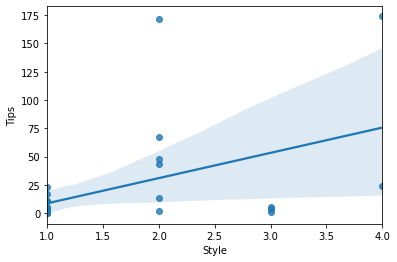

In [40]:
import seaborn as sns

plot = sns.regplot(x = 'Style', y = 'Tips', data =tampabay_brews)


While this graph does not provide the best information here is what we can take from it.
1. Tap hourses recieve very few tips on average.
2. Micro Brews have the widest range of tips.
3. Brew Pubs have very few tips reported.
4. Regional breweries all recieve tips.

Making a smaller datafram to use to analyze with only needed information.

In [46]:
TB=tampabay_brews[[ 'Style', 'City', 'Ratings', 'Tips', 'Brewery']]
TB

,Style,City,Ratings,Tips,Brewery
Style,,,,,
0,1,Tampa,8.5,1,Magnanimous Brewing
1,1,Tampa,8.5,0,Late Start Brewing
2,4,Tampa,9.5,174,Cigar City Brewing
3,1,Tampa,8.5,1,BarrieHaus Beer Co
4,1,Tampa,8.5,2,Bastet Brewing
5,2,Tampa,8.5,2,Brew Bus Brewing
6,3,Tampa,7.2,5,Bay Cannon Beer Company
7,1,Tampa,8.5,1,Woven Water Brewing Company
8,4,Tampa,9.5,24,Coppertail Brewing Company


In [47]:
TB.describe

<bound method NDFrame.describe of        Style              City  Ratings  Tips                        Brewery
Style                                                                       
0          1             Tampa      8.5     1            Magnanimous Brewing
1          1             Tampa      8.5     0             Late Start Brewing
2          4             Tampa      9.5   174             Cigar City Brewing
3          1             Tampa      8.5     1             BarrieHaus Beer Co
4          1             Tampa      8.5     2                 Bastet Brewing
5          2             Tampa      8.5     2               Brew Bus Brewing
6          3             Tampa      7.2     5        Bay Cannon Beer Company
7          1             Tampa      8.5     1    Woven Water Brewing Company
8          4             Tampa      9.5    24     Coppertail Brewing Company
9          2             Tampa      8.3    13              81Bay Brewing Co.
10         3             Tampa      7.8   

Turning the City names into dummy variables for analysis.  

0. Tampa
1. St. Petersburg

In [48]:
TB['City'] = TB['City'].replace(['Tampa'], 0)
TB['City'] = TB['City'].replace(['Saint Petersburg'], 1)
TB

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Style,City,Ratings,Tips,Brewery
Style,,,,,
0,1,0,8.5,1,Magnanimous Brewing
1,1,0,8.5,0,Late Start Brewing
2,4,0,9.5,174,Cigar City Brewing
3,1,0,8.5,1,BarrieHaus Beer Co
4,1,0,8.5,2,Bastet Brewing
5,2,0,8.5,2,Brew Bus Brewing
6,3,0,7.2,5,Bay Cannon Beer Company
7,1,0,8.5,1,Woven Water Brewing Company
8,4,0,9.5,24,Coppertail Brewing Company


In [49]:
TB.dtypes

Style        int64
City         int64
Ratings    float64
Tips         int64
Brewery     object
dtype: object

In [56]:
TB[['Style', 'Ratings', 'City']].corr()

,Style,Ratings,City
Style,1.000000,0.279008,-0.395285
Ratings,0.279008,1.000000,-0.139634
City,-0.395285,-0.139634,1.000000


Based on thes correlation results there is a positive correlation between ratings and the style of brewery.
Exploring the data set you can see that style 4 which is Regional has the best overall ratings followed by style 2 which are Micro Breweries.

The histogram below is not too useful but it does show how many breweries of each type.  You can see easily that Tap Houses are the majority.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f879fe83dd0>]],
      dtype=object)

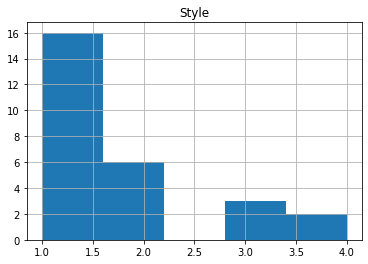

In [58]:
TB.hist(column='Style', bins = 5)

The next few lines of code convert the data frame to a numpy array so K Nearest Neighbors can be used to analyze the data.

In [59]:
X = TB[['City', 'Ratings', 'Tips']]
X[0:5]

,City,Ratings,Tips
Style,,,
0,0,8.5,1
1,0,8.5,0
2,0,9.5,174
3,0,8.5,1
4,0,8.5,2


In [60]:
y = TB['Style'].values
y[0:5]

array([1, 1, 4, 1, 1])

In [61]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.89442719,  0.07548425, -0.49776137],
       [-0.89442719,  0.07548425, -0.51982961],
       [-0.89442719,  1.9282794 ,  3.32004381],
       [-0.89442719,  0.07548425, -0.49776137],
       [-0.89442719,  0.07548425, -0.47569313]])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (21, 3) (21,)
Test set: (6, 3) (6,)


In [68]:
k=6
TBn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
TBn

KNeighborsClassifier(n_neighbors=6)

In [69]:
yhat = TBn.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [70]:
print("Train set Accuracy:", metrics.accuracy_score(y_train, TBn.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.5714285714285714
Test set Accuracy: 0.8333333333333334


In [72]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    TBn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=TBn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([1.        , 0.83333333, 1.        , 1.        , 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.83333333])

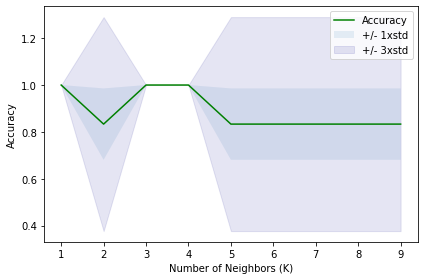

In [75]:
plt.plot(range(1, Ks),mean_acc, 'g')
plt.fill_between(range(1, Ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks),mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='darkblue')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Based on the graph here if you are to look at the four closest to each other, they should all be the same style which would be a Tap House as that is the most popular style in Tampa Bay.